<a href="https://colab.research.google.com/github/KOdunga/MITIDSS/blob/main/streetviewhousingnumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Street View Housing Number Digit Recognition

**Objective:** To build a feed forward neural network that can recognize the digits in a street view image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [3]:
#Check the version of the tensor flow
print(tf.__version__)

2.8.2


In [4]:
#Load and Split the dataset
import h5py
#Open the file as read only
h5f = h5py.File('/content/drive/MyDrive/DSML/SVHN_single_grey1.h5','r')

#Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

#Close the file
h5f.close()


In [5]:
#Check the number of images in the training and the testing dataset
len(X_train), len(X_test)

(42000, 18000)

- There are 42,000 images in the training set and 18,000 images in the testing set

##Visualizing Images

Use Xtrain to visualize the first 10 images and Ytrain to visualize the first 10 labels

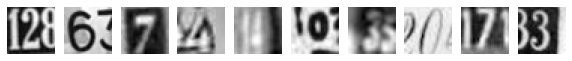

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
plt.figure(figsize=(10,1))

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
plt.show()
print('label for each of the above image: %s' %(y_train[0:10]))

### Data Preparation

- Print the shape and the array of pixels for the first image in the training dataset
- Reshape the train and test data set because we always have to give 4D array as input to CNNs
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test dataset
- One hot encode the target variable

In [7]:
print('Shape: ', X_train[0].shape)
print()
print('First image:\n', X_train[0])

Shape:  (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
#reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0],1024)

In [9]:
#Normalize inputs from 0-255 to 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
#New shape
print('Training set: ', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set:  (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [11]:
#One hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test #no of classes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

Notice that each entry of the target variable is a one-hot encoded vector instead of a single label

## Model Building

We now need to build an ANN model

In [13]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Architecture**
- Build A model with
  - First hidden layer with 64 nodes and the relu activation and the input shape = (1024)
  - Second hidden layer with 32 nodes and the relu activation
  - Output layer with activation as 'softmax'and number of nodes equal to the number of classes 1.e 10
  - Compile the model with the loss equal to categorical_cross_entropy, optimizer equal to Adam (learning rate= 0.001) and metric equal to accuracy
- Fit to the train data with a validationsplit of 0.2, batch size = 128, verbose = 1 and epochs=20. Store the model building history to use later for visualization

In [15]:
from tensorflow.keras import losses
from tensorflow.keras import  optimizers

#Create model
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape = (1024,)))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

#Compile the model
adam = optimizers.Adam(learning_rate = 0.001)
model1.compile(loss = losses.categorical_crossentropy, optimizer = adam, metrics = ['accuracy'])

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


**Observations**
- The model has 68,010 parameters
- All parameters are trainable

In [18]:
history_model_1 = model1.fit(X_train,y_train, validation_split= 0.2,epochs = 20, batch_size= 128, verbose= 1)

Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 1.7953 - accuracy: 0.3824 - val_loss: 1.6499 - val_accuracy: 0.4551
Epoch 4/20
263/263 [==============================] - 1s 6ms/step - loss: 1.5726 - accuracy: 0.4828 - val_loss: 1.4957 - val_accuracy: 0.5094
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4604 - accuracy: 0.5268 - val_loss: 1.4267 - val_accuracy: 0.5357
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4008 - accuracy: 0.5503 - val_loss: 1.3652 - val_accuracy: 0.5613
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5682 - val_loss: 1.3282 - val_accuracy: 0.5799
Epoch 

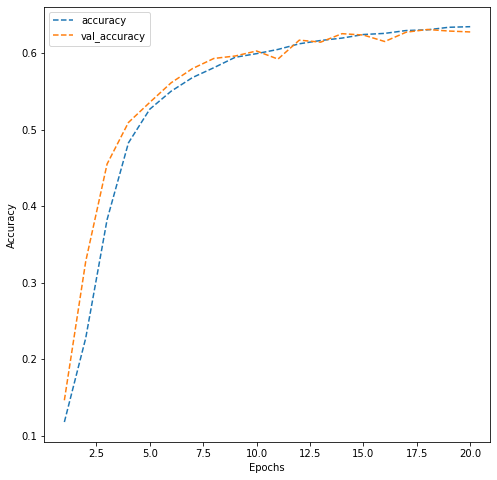

In [20]:
#Plotting the accuracies
dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()         


- As the accuracy of the train and validation sets are almost similar, we can say that the model is giving a generalized perfomance
- Validation accuracy has started to flactuate after 10 epochs, while training accuracy is increasing with the number of epochs.

**We build one more model with higher complexity and see if we can improve the perfomance of the model**

In [21]:
from tensorflow.keras import backend
backend.clear_session()

In [22]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Architecture**
- Building  A sequential model with the following architecture
  - First hidden layer with 256 nodes and the relu activation and the input shape = (1024,)
  - Second hidden layer with 128 nodes and the relu activation
  - Add the dropout layer with the rate equal to 0.2
  - Third hidden layer with 64 nodes and the relu activation
  - Fourth hidden layer with 32 nodes and the relu activation
  - Add the batch normalization layer
  - Output layer with activation as 'softmax'and number of nodes equal to the number of classes 1.e 10
  - Compile the model with the loss equal to categorical_cross_entropy, optimizer equal to Adam (learning rate= 0.0005) and metric equal to accuracy
- Fit to the train data with a validationsplit of 0.2, batch size = 128, verbose = 1 and epochs=30. Store the model building history to use later for visualization

In [25]:
from tensorflow.keras import losses
from tensorflow.keras import  optimizers

#Create model
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape = (1024,)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation = 'softmax'))

#Compile the model
adam = optimizers.Adam(learning_rate = 0.0005)
model2.compile(loss = losses.categorical_crossentropy, optimizer = adam, metrics = ['accuracy'])

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)              

**Observations**
- The total number of parameters has increased by about 4.5 times the previous model. This model is much more complex.
- There are 64 non-trainable parameters. They belong to the batch normalization layer

In [27]:
history_model_2 = model2.fit(X_train,y_train, validation_split= 0.2,epochs = 30, batch_size= 128, verbose= 1)

Epoch 1/30
263/263 [==============================] - 4s 11ms/step - loss: 2.3457 - accuracy: 0.1037 - val_loss: 2.3102 - val_accuracy: 0.1010
Epoch 2/30
263/263 [==============================] - 3s 11ms/step - loss: 2.2069 - accuracy: 0.1650 - val_loss: 2.0666 - val_accuracy: 0.2689
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 1.7101 - accuracy: 0.4050 - val_loss: 1.5476 - val_accuracy: 0.4961
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.4177 - accuracy: 0.5277 - val_loss: 1.2909 - val_accuracy: 0.5774
Epoch 5/30
263/263 [==============================] - 4s 13ms/step - loss: 1.2512 - accuracy: 0.5927 - val_loss: 1.1351 - val_accuracy: 0.6310
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 1.1604 - accuracy: 0.6267 - val_loss: 1.0348 - val_accuracy: 0.6730
Epoch 7/30
263/263 [==============================] - 4s 15ms/step - loss: 1.0899 - accuracy: 0.6501 - val_loss: 1.0580 - val_accuracy: 0.6530

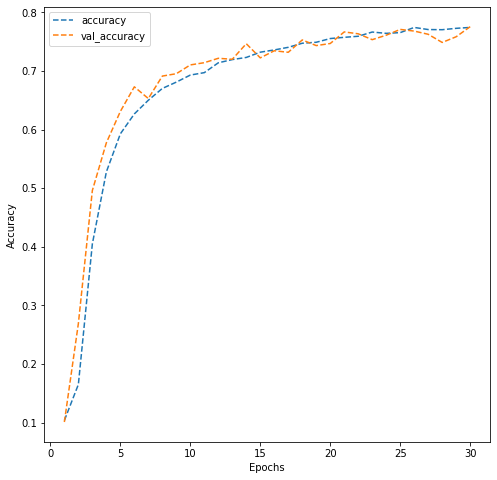

In [28]:
#Plotting the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()  

**Observations**
- Second more complex model is perfoming much better than the first model
- Train and validation model has improved significantly
- Validation accuracy is slightly higher than the training accuracy, which implies that the model complexity can be further increased.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations on the obtained results

In [29]:
test_pred = model2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)


In [30]:
y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1814
           1       0.72      0.85      0.78      1828
           2       0.77      0.81      0.79      1803
           3       0.73      0.73      0.73      1719
           4       0.74      0.86      0.80      1812
           5       0.81      0.69      0.75      1768
           6       0.82      0.75      0.78      1832
           7       0.86      0.79      0.83      1808
           8       0.70      0.77      0.73      1812
           9       0.79      0.74      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



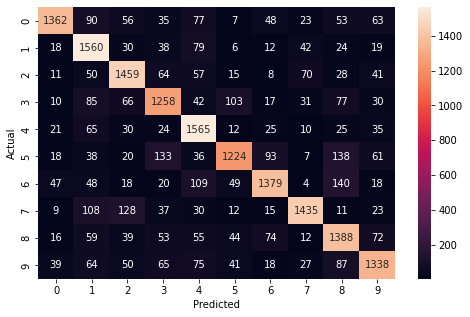

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#plot the heatmap
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations**
- The accuracy is 78% on the test set. This is comparable with results on the train and validation sets which means the model is generalizing well
- Recall values for all the digits are higher than 70% exceptdigit 5
- Highest recall at 86% is for digit 4,i.e the model can identify 86% of images with digit 4
- The least precision is for digit 1 and 8.
- There is an indication that the model is not able to identify small variations among digits.